Using the same function as before:
u' = cu + sin(t)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
c = -100
## ^ for posterity
def F(t):
    # our non linear component
    return np.sin(t)

def timestep(u_n, I, h):
    # u_n is the previous time step
    # I is the integral of the non linear part
    # h is out time step width
    return u_n*np.exp(c*h) + I

#I need to define my coefficients of RK4
def a1(ch):
    z = ch
    return (z/6 + z**3/24 + z**2/6 + z**4/24)/c

def b1(ch):
    z = ch
    return (z/6 + z**2/12 + z**3/24)/c

def c1(ch):
    z = ch
    return (z/6-z**3/24)/c

#Now using the rk4 method
def I_RK4(t,h,f1coeff,f2coeff,f4coeff):
    f1 = F(t)
    f2 = F(t + h/2)
    f3 = F(t + h/2)
    #Note: because our function F is not dependent on U our f2 = f3
    #      normally f2 = F(u_n + f1*h, t+h/2) , f3 = F(u_n + f2*h, t+h/2)
    f4 = F(t+h)

    part1 = f1*f1coeff

    part2 = 2*(f2 + f3)*f2coeff

    part3 = f4*f4coeff

    return  (part1 + part2 + part3)
    

In [3]:
T = Total_Time = 5 
h = Step_Size = 0.001
u_0 = Initial_Condition = 1
c = -100

In [4]:
def N_For_Step(Step_Size,Total_Time):
    return int(Total_Time/Step_Size)

In [5]:

def ETDRK4(Total_Time, Number_of_Points , Initial_Condition):
    T = Total_Time
    N = int(Number_of_Points)
    u_0 = Initial_Condition
    h = T/N
    ## initialise my coefficients

    coeff1 = a1(c*h)
    coeff2 = b1(c*h)
    coeff3 = c1(c*h)

    
    tvec = np.arange(N+1)*h
    uvec = np.zeros(N+1)
    uvec[0] = u_0

    


    for i in range(N):
        I = I_RK4(tvec[i],h,coeff1,coeff2,coeff3)
        uvec[i+1] = timestep(uvec[i], I, h)
    return uvec,tvec

In [6]:
def U_true(t,u_0):
    return u_0*np.exp(c*t) + (np.exp(c*t)-c*np.sin(t)-np.cos(t))/(1+c**2)

<function matplotlib.pyplot.show(close=None, block=None)>

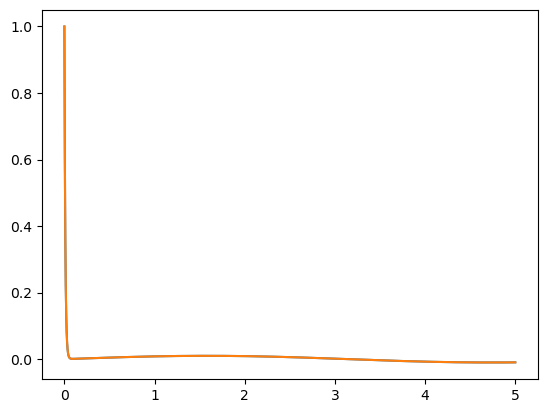

In [7]:
N = N_For_Step(h,T)

y,x = ETDRK4(T,N,u_0)

plt.plot(x,y)
plt.plot(x,U_true(x,1))
plt.show

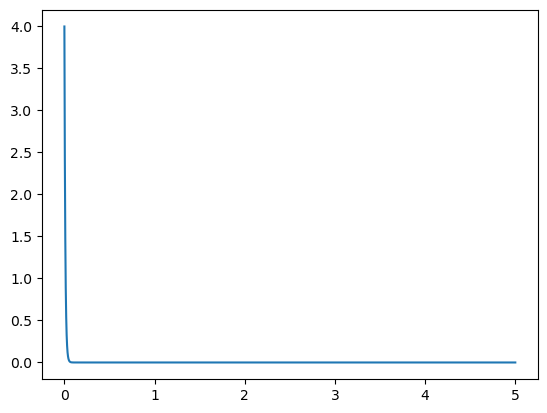

In [8]:
plt.plot(x,np.abs(y - U_true(x,5)))

In [9]:
errorN = 10


Test_N = np.zeros(errorN)


for i in range(0,errorN):
    Test_N[i] = int((T)*(10**(1+i/2)))
Test_H  = (T)/Test_N

In [10]:
Error_Vec1 = np.zeros(errorN)

for i in range(0, errorN):
    (y1,x) = ETDRK4(T, Test_N[i], u_0)
    print(x.size)
    yTrue = U_true(x,u_0)
    
    #if i == 6:
    #    plt.plot(x,y2-yTrue, label = ["order of step size" , i/2])
    #elif i == 12:
    #    plt.plot(x,y2-yTrue, label = ["order of step size" , i/2])
    Error_Vec1[i] = Test_H[i]**0.5*np.linalg.norm(y1-yTrue)
#plt.legend()
#plt.xlabel("time")
#plt.ylabel("error from true soln")

51
159
501
1582
5001
15812
50001
158114
500001
1581139


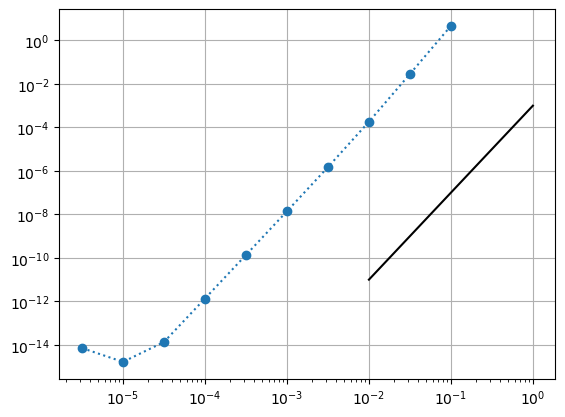

In [11]:
plt.loglog(Test_H, Error_Vec1, ':o')
plt.loglog([1e-2,1],[1e-11,1e-3],'k-')
plt.grid()

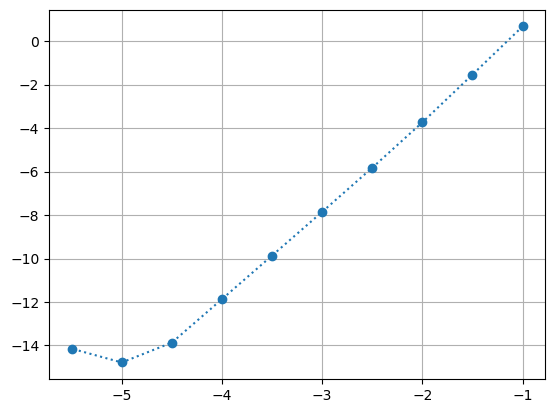

In [12]:
plt.plot(np.log10(Test_H), np.log10(Error_Vec1), 'o:')
plt.grid()

In [13]:
def ETDRK4_Contour(Total_Time, Number_of_Points, Initial_Condition):
    T = Total_Time
    N = int(Number_of_Points)
    u_0 = Initial_Condition
    h = T/N

    ## initialise my coefficients

    coeff1 = a2(c,h)
    coeff2 = b2(c,h)
    coeff3 = c2(c,h)

    tvec = np.arange(N+1)*h
    uvec = np.zeros(N+1)
    uvec[0] = u_0


    for i in range(N):
        I = I_RK4(tvec[i],h,coeff1,coeff2,coeff3)
        uvec[i+1] = timestep(uvec[i], I, h)
    return uvec,tvec

In [14]:
def a2(c,h):
    M = 32  # number of points for complex means
    r = np.exp(1j * np.pi * (np.arange(1, M + 1)-0.5) / M)
    z = c*h + r
    return h*np.mean((-4 -z +np.exp(z)*(4-3*z+z**2))/(z**3)).real

def b2(c,h):
    M = 32  # number of points for complex means
    r = np.exp(1j * np.pi * (np.arange(1, M + 1)-0.5) / M)
    z = c*h + r
    return h*np.mean((2 + z + np.exp(z)*(-2 +z))/(z**3)).real

def c2(c,h):
    M = 32  # number of points for complex means
    r = np.exp(1j * np.pi * (np.arange(1, M + 1)-0.5) / M)
    z = c*h + r
    return h*np.mean((-4-3*z -z**2 +np.exp(z)*(4-z))/(z**3)).real


In [15]:
errorN = 10


Test_N = np.zeros(errorN)


for i in range(0,errorN):
    Test_N[i] = int((T)*(10**(1+i/2)))
Test_H  = (T)/Test_N

In [16]:
Error_Contour = np.zeros(errorN)

for i in range(0, errorN):
    (y1,x) = ETDRK4_Contour(T, Test_N[i], u_0)
    print(x.size)
    yTrue = U_true(x,u_0)
    
    #if i == 6:
    #    plt.plot(x,y2-yTrue, label = ["order of step size" , i/2])
    #elif i == 12:
    #    plt.plot(x,y2-yTrue, label = ["order of step size" , i/2])
    Error_Contour[i] = Test_H[i]**0.5*np.linalg.norm(y1-yTrue)
#plt.legend()
#plt.xlabel("time")
#plt.ylabel("error from true soln")

51
159
501
1582
5001
15812
50001
158114
500001
1581139


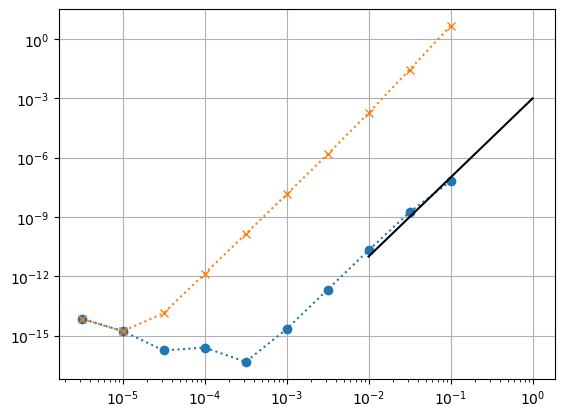

In [17]:
plt.loglog(Test_H, Error_Contour, ':o')
plt.loglog(Test_H, Error_Vec1, ':x')
plt.loglog([1e-2,1],[1e-11,1e-3],'k-')
plt.grid()

In [18]:
def ETDRK4_Naive(Total_Time, Number_of_Points, Initial_Condition):
    T = Total_Time
    N = int(Number_of_Points)
    u_0 = Initial_Condition
    h = T/N

    coeff1 = a3(c,h)
    coeff2 = b3(c,h)
    coeff3 = c3(c,h)

    
    tvec = np.arange(N+1)*h
    uvec = np.zeros(N+1)
    uvec[0] = u_0


    for i in range(N):
        I = I_RK4(tvec[i],h,coeff1,coeff2,coeff3)
        uvec[i+1] = timestep(uvec[i], I, h)
    return uvec,tvec

In [19]:
def a3(c,h):
    return (-4 -h*c +np.exp(c*h)*(4 -3*h*c +(h*c)**2))/((h**2)*(c**3))

def b3(c,h):
    return (2 +h*c +np.exp(c*h)*(-2 +h*c))/((h**2)*(c**3))

def c3(c,h):
    return (-4 -3*h*c -(h*c)**2 + np.exp(c*h)*(4 -h*c))/((h**2)*(c**3))



In [29]:
Error_Naive = np.zeros(errorN)

for i in range(0, errorN):
    (y1,x) = ETDRK4_Naive(T, Test_N[i], u_0)
    print(x.size)
    yTrue = U_true(x,u_0)
    
    #if i == 6:
    #    plt.plot(x,y2-yTrue, label = ["order of step size" , i/2])
    #elif i == 12:
    #    plt.plot(x,y2-yTrue, label = ["order of step size" , i/2])
    Error_Naive[i] = np.linalg.norm(y1-yTrue)
#plt.legend()
#plt.xlabel("time")
#plt.ylabel("error from true soln")

51
159
501
1582
5001
15812
50001
158114
500001
1581139


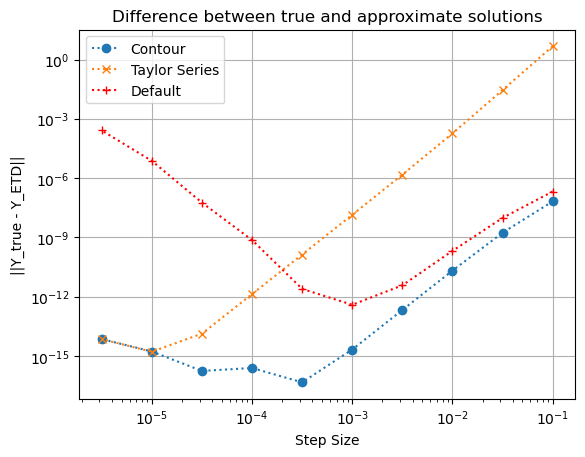

In [30]:
plt.loglog(Test_H, Error_Contour, ':o', label = "Contour")
plt.loglog(Test_H, Error_Vec1, ':x', label = "Taylor Series")
plt.loglog(Test_H, Error_Naive, 'r:+', label = "Default")
#plt.loglog([1e-2,1],[1e-11,1e-3],'k-')
plt.xlabel("Step Size")
plt.ylabel("||Y_true - Y_ETD||")
plt.title("Difference between true and approximate solutions")
plt.legend()
plt.grid()

Code here taken from the numerical errors notebook

In [22]:
def solve_Cpu(u1, h1, u2, h2, u3, h3):

    # Define a function of C, p, u0 that is zero
    # when the convergence equations are satisfied
    def G(params):
        C, p, u0 = params
        return [
            u1 - u0 - C*h1**p,
            u2 - u0 - C*h2**p,
            u3 - u0 - C*h3**p
        ]

    # Return the root of this function
    C, p, u0 = root(G, [1,2,1]).x
    
    return C, p, u0

In [23]:
N1 = 5*10**2
N2 = 5*10**3
N3 = 5*10**4

N = np.array([N1, N2, N3])

h = T/N

Contour_sols = []
Taylor_sols = []
Exact_sols = []

for i in range(3):
    print(i)
    Contour_sols.append(ETDRK4_Contour(T,N[i],u_0)[0][-1])

0
1
2


In [24]:
Contour_sols

[np.float64(-0.009616647304188621),
 np.float64(-0.009616647300448037),
 np.float64(-0.009616647300447709)]